In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tele_churn.csv")

In [4]:
#Dropping customer id as it doesnt provides us any benifit for churn but just in case we made aa copy of the orignal data
df_raw = df.copy()
df = df.drop(columns=['customerID'])

In [5]:
#totalcharges is stored in obj form so we changed it to numeric and handled missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [6]:
#Making the internet and phone service data easier to read and operate on
df.replace({
    'No internet service': 'No',
    'No phone service': 'No'
}, inplace=True)

In [7]:
#Converting yes/no in binary form for easier operations
binary_cols = df.select_dtypes(include='object').columns

for col in binary_cols:
    if df[col].nunique() == 2:
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [8]:
#What percentage of customers have churned?
churnned_customers = df["Churn"].sum()
total_customers = len(df)
percentage = (churnned_customers/total_customers)*100
percentage

np.float64(26.536987079369588)

### Insight
Approximately  26.5% of customers have churned which could be considered a significant portion


<Axes: xlabel='Churn', ylabel='tenure'>

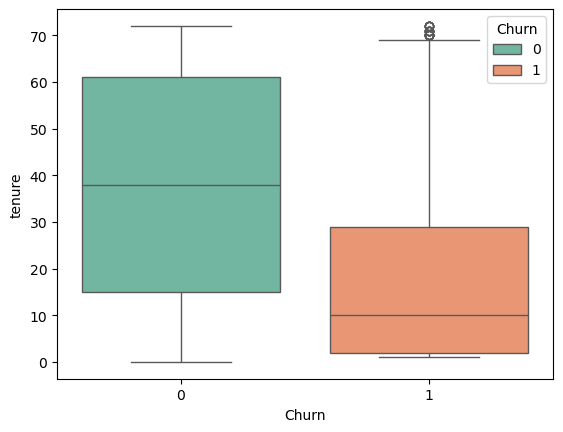

In [9]:
#How does churn vary with tenure?
df.groupby('Churn')['tenure'].agg(['mean', 'median'])
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(
    x='Churn',
    y='tenure',
    hue='Churn',
    data=df,
    palette='Set2',
    dodge=False
)



### Insight
Customers who churn have significantly lower tenure compared to retained customers. This indicates that churn is concentrated among newer customers, while long-term customers are more likely to stay

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

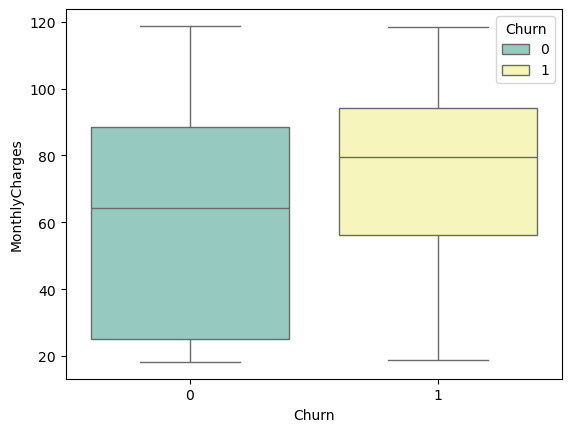

In [11]:
#Do higher monthly charges increase churn?
df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'median'])

sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=df,
    palette='Set3',
    dodge=False
)

### Insight
Churned customers have higher average and median monthly charges compared to retained customers, suggesting that pricing plays a role in churn behavior.

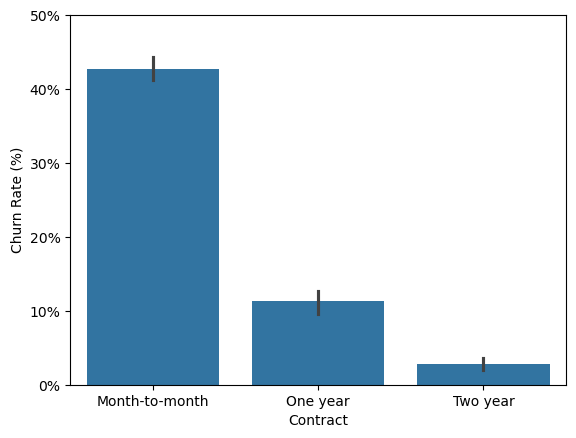

In [12]:
#Which contract type has the highest churn?
df.groupby('Contract')["Churn"].mean()*100
sns.barplot(x='Contract', y='Churn', data=df)
plt.ylabel('Churn Rate (%)')
plt.yticks(
    ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5],
    labels=['0%', '10%', '20%', '30%', '40%', '50%']
)
plt.show()




### Insight
Customers on month-to-month contracts have a significantly higher churn rate compared to customers on longer-term contracts. Churn decreases sharply as contract length increases, indicating that customer commitment plays a major role in retention.

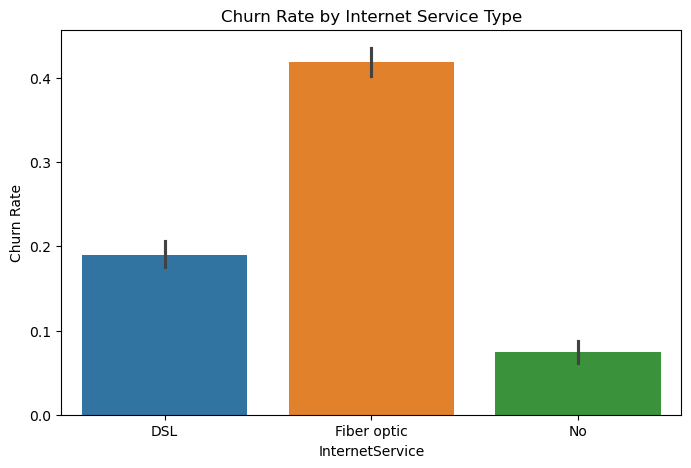

In [18]:
#Does internet service type affect churn?
df.groupby("InternetService")["Churn"].mean()*100

plt.figure(figsize=(8,5))
sns.barplot(
    x='InternetService',
    y='Churn',
    hue='InternetService',
    data=df,
    dodge=False
)

plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service Type')
plt.show()

### Insight 
Customers using fiber-optic internet churn significantly more than DSL and non-internet customers, likely due to higher costs and service expectations.

In [25]:
#Do customers without tech support / security churn more?

print(df.groupby('TechSupport')['Churn'].mean() * 100)
df.groupby('OnlineSecurity')['Churn'].mean() * 100


TechSupport
0    31.186237
1    15.166341
Name: Churn, dtype: float64


OnlineSecurity
0    31.329618
1    14.611194
Name: Churn, dtype: float64

### Insight 
Both TechSupport and OnlineSecurity show nearly identical churn patterns, with customers lacking these services exhibiting roughly double the churn rate. This suggests that access to support and security services plays a crucial role in customer retention.

SeniorCitizen
0    23.606168
1    41.681261
Name: Churn, dtype: float64


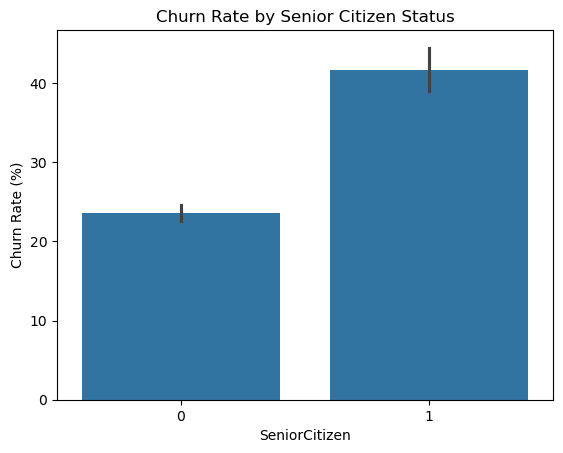

In [26]:
#Are senior citizens more likely to churn?
print(df.groupby('SeniorCitizen')['Churn'].mean() * 100)

#a copy of dataset df pct
df_pct = df.copy()
df_pct['ChurnPct'] = df_pct['Churn'] * 100

sns.barplot(x='SeniorCitizen', y='ChurnPct', data=df_pct)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Senior Citizen Status')
plt.show()


### Which customer segment is most valuable yet at high churn risk?
Senior citizens show a significantly higher churn rate compared to non senior customers. However this effect is likely influenced by related factors such as pricing, contract type, and access to support services rather than age alone.

### Final Insight

>1. Contract type is the strongest driver of churn (Monthly contracted customers show extreme churn)
>2. Churn is concentrated in early customer tenure(New customers tend to churn more)
>3. Higher monthly charges are associated with higher churn
>4. Internet service type strongly affects churn (about 42% Fibre optic users churn which is way higher compared to dsl
>5. Lack of support services doubles churn risk( Online security and Tech support)
>6. Senior citizens churn significantly more

### Business Recommendations
>1. Offer incentives to switch to long-term contracts(Targetting monthy users)
>2. Provide onboarding support in the first few months (Improving early customer exp)
>3. Encourage or default-include Tech support and onlineSecurity for fibre users
>4. Do not waste retention budget on low risk customers(Like customers with 2 year contracts)